In [ ]:
from google.colab import files
# Upload files
crypto_data = files.upload()

Saving BTC-2021min.csv to BTC-2021min.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv('BTC-2021min.csv')
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...,...
610777,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


In [ ]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


In [ ]:
# convert date column from object to a datetime type
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# generate summary statistics
df.describe()

,unix,date,open,high,low,close,Volume BTC,Volume USD
count,6.107820e+05,610782,610782.000000,610782.000000,610782.000000,610782.000000,610782.000000,6.107820e+05
mean,1.627783e+09,2021-08-01 01:51:30.000099072,46482.265381,46509.783597,46454.085712,46482.567211,3.165254,1.389474e+05
min,1.609459e+09,2021-01-01 00:01:00,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,1.618621e+09,2021-04-17 00:56:15,38129.052500,38157.882500,38099.437500,38129.137500,0.193192,8.859586e+03
50%,1.627783e+09,2021-08-01 01:51:30,46666.960000,46697.745000,46636.710000,46667.295000,0.924971,4.190121e+04
75%,1.636944e+09,2021-11-15 02:46:45,54907.797500,54938.655000,54877.405000,54907.412500,2.989888,1.349341e+05
max,1.646106e+09,2022-03-01 03:43:00,69000.000000,69000.000000,68799.990000,69000.000000,398.565948,1.396792e+07
std,1.057906e+07,NaN,9453.990285,9454.798088,9453.135638,9454.107853,7.893321,3.298068e+05


In [ ]:
# data Type Check
df.dtypes

unix                   int64
date          datetime64[ns]
symbol                object
open                 float64
high                 float64
low                  float64
close                float64
Volume BTC           float64
Volume USD           float64
dtype: object

In [ ]:
# check for duplicates
df.duplicated().sum()

0

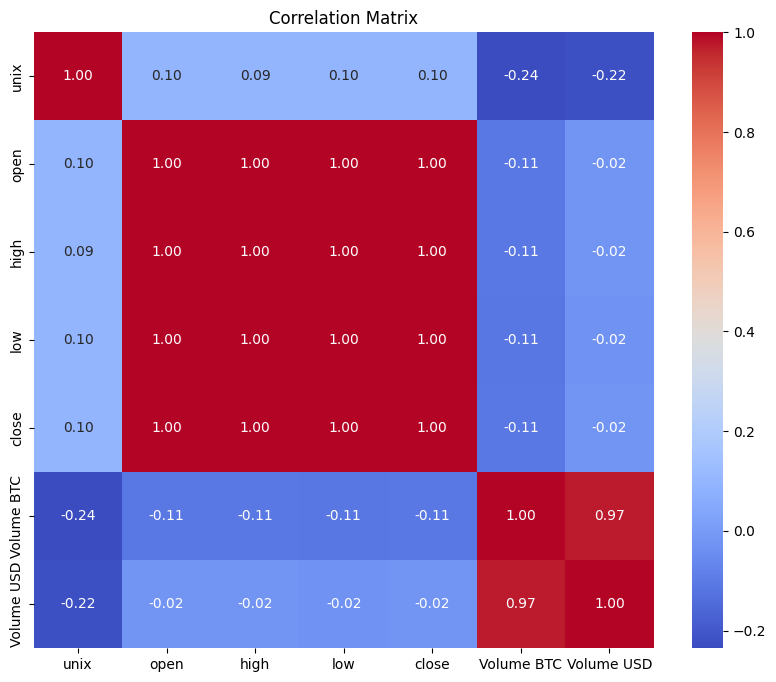

In [ ]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

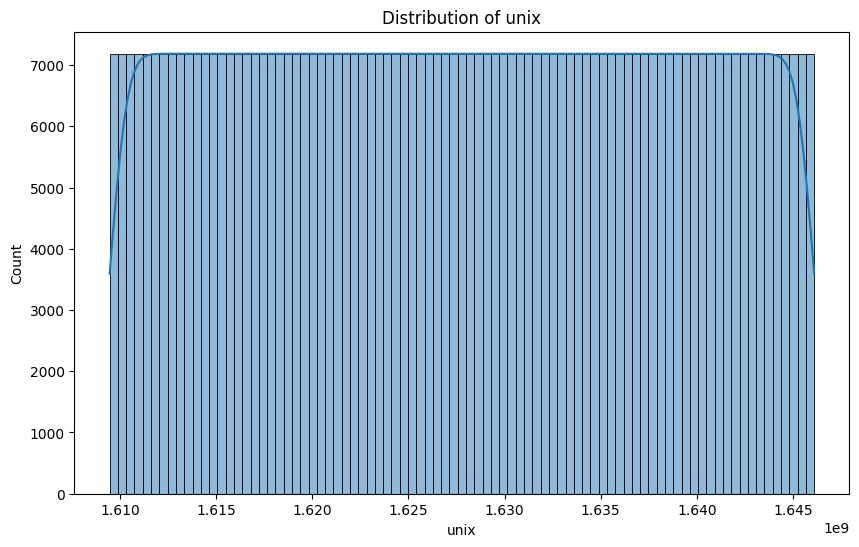

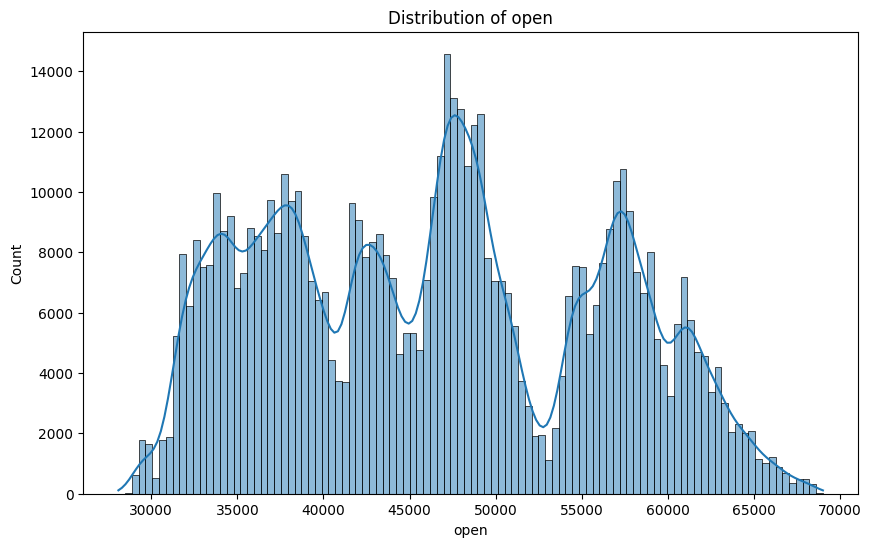

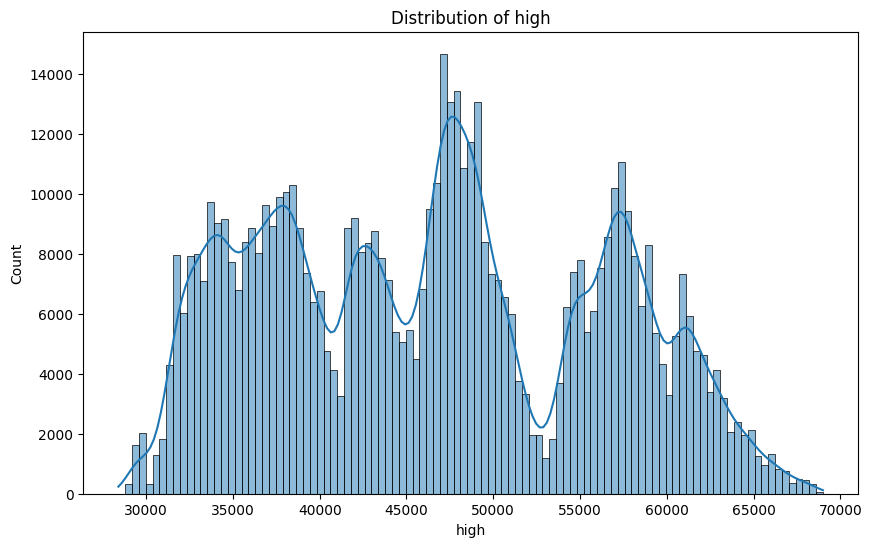

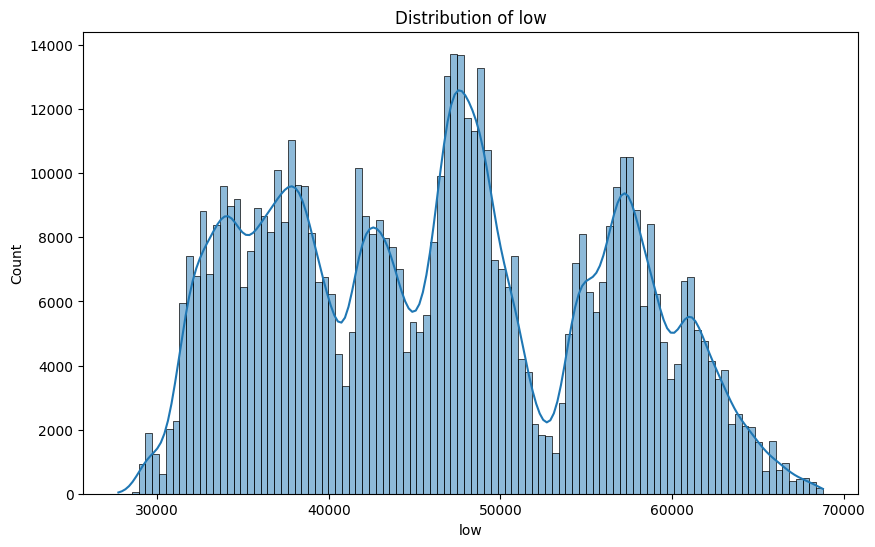

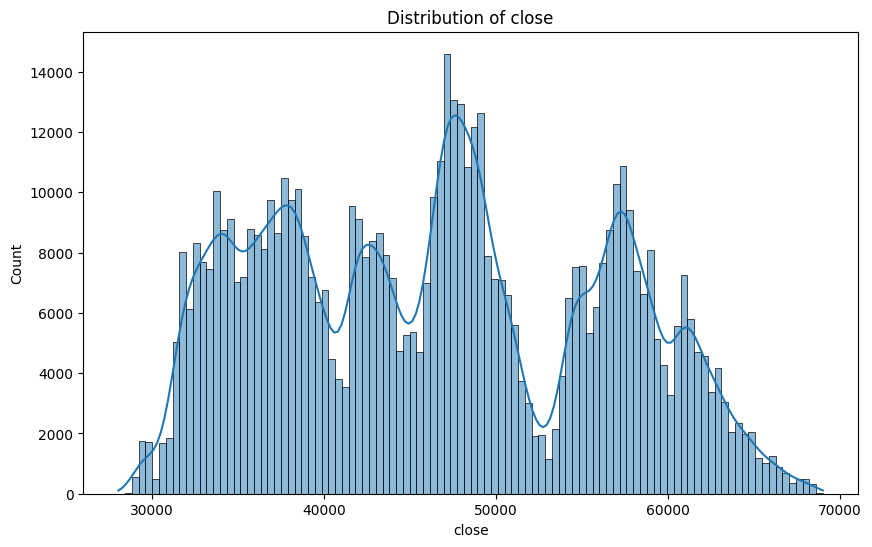

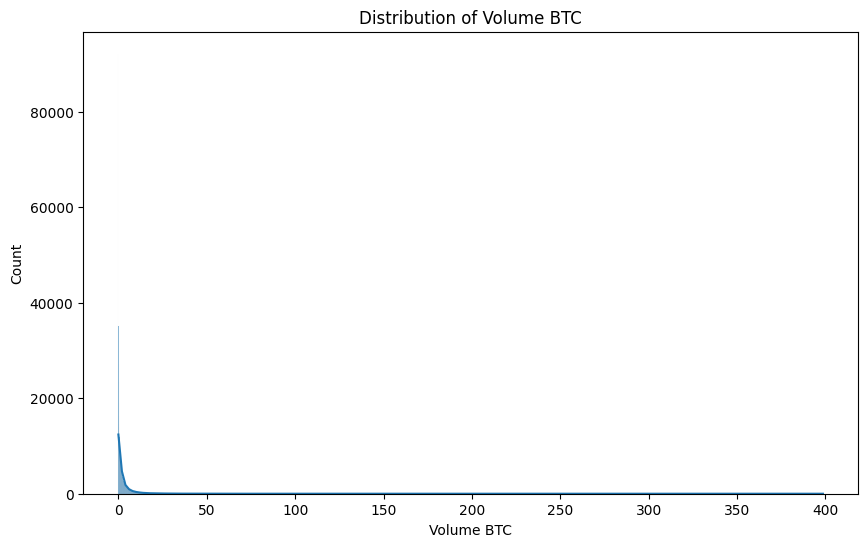

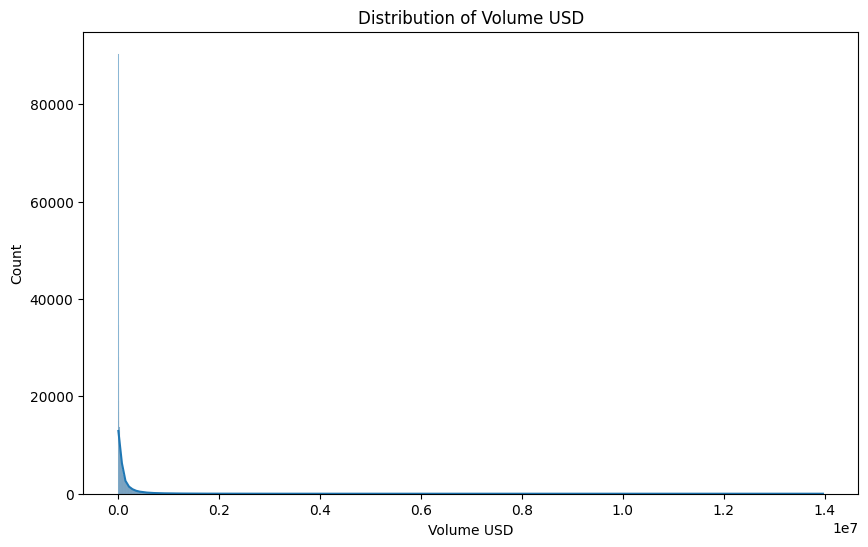

In [ ]:
# Distribution Plots
for column in numeric_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


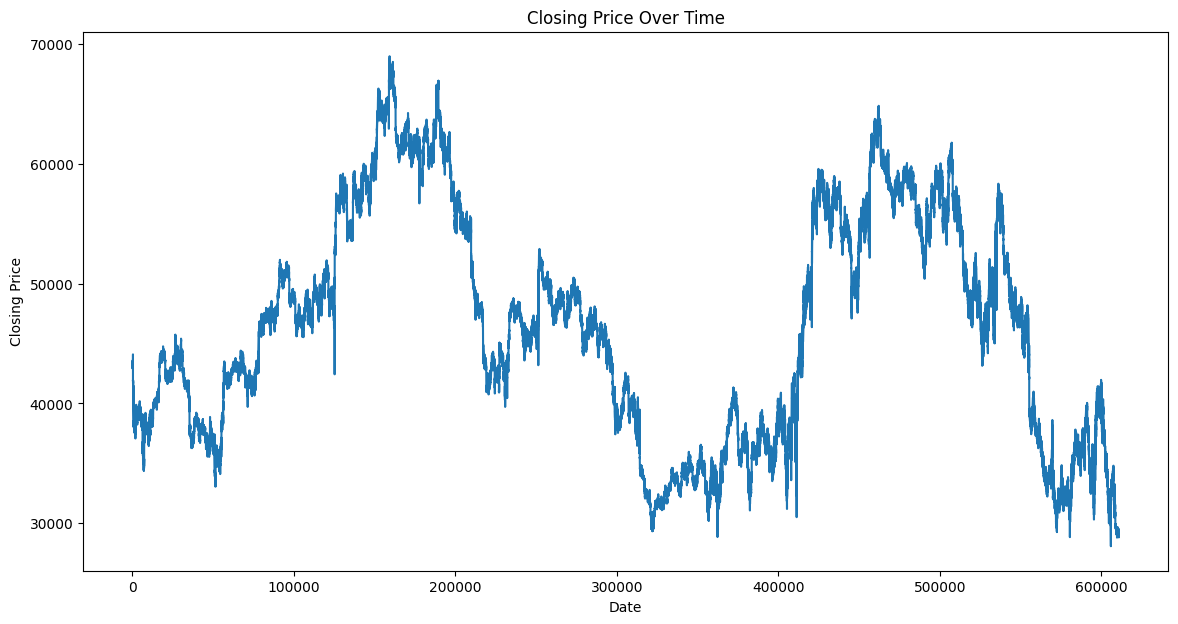

In [ ]:
# time series plot
plt.figure(figsize=(14, 7))
plt.plot(df['close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


Aanalyze the volatility of Bitcoin prices using standard deviation

In [ ]:
# # Calculate rolling standard deviation (volatility) over a 10-day window
df['Volatility'] = df['close'].rolling(window=10).std()
df['Volatility']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
610777    65.469294
610778    67.907785
610779    57.017349
610780    55.255906
610781    53.354906
Name: Volatility, Length: 610782, dtype: float64

In [ ]:
df.dropna(subset=['Volatility'], inplace=True)
df['Volatility']

9         35.433818
10        37.718935
11        38.819423
12        33.310729
13        18.342702
            ...    
610777    65.469294
610778    67.907785
610779    57.017349
610780    55.255906
610781    53.354906
Name: Volatility, Length: 610773, dtype: float64

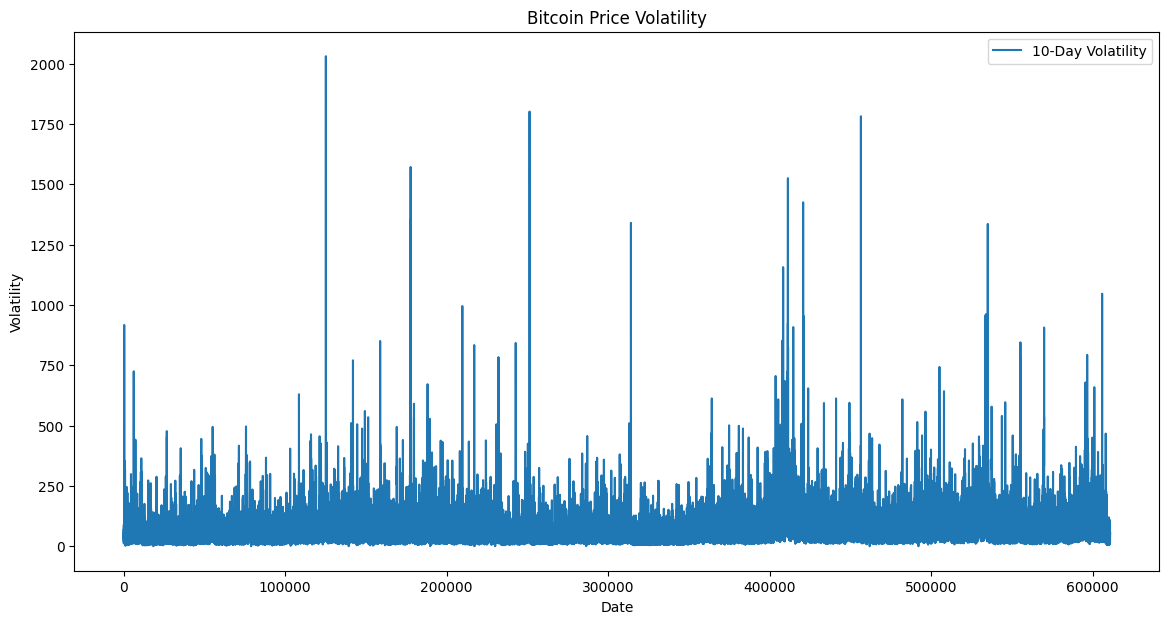

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volatility'], label='10-Day Volatility')
plt.title('Bitcoin Price Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

Average True Range (ATR)

In [ ]:
def calculate_atr(data, window):
    data['high-low'] = data['high'] - data['low']
    data['high-prev_close'] = abs(data['high'] - data['close'].shift(1))
    data['low-prev_close'] = abs(data['low'] - data['close'].shift(1))
    data['true_range'] = data[['high-low', 'high-prev_close', 'low-prev_close']].max(axis=1)
    data['ATR'] = data['true_range'].rolling(window=window).mean()
    data.drop(['high-low', 'high-prev_close', 'low-prev_close', 'true_range'], axis=1, inplace=True)
    return data

df = calculate_atr(df, 10)
df['ATR'].fillna(0, inplace=True)
df['ATR']

9          0.000
10         0.000
11         0.000
12         0.000
13         0.000
           ...  
610777    71.331
610778    70.619
610779    65.878
610780    58.318
610781    57.032
Name: ATR, Length: 610773, dtype: float64

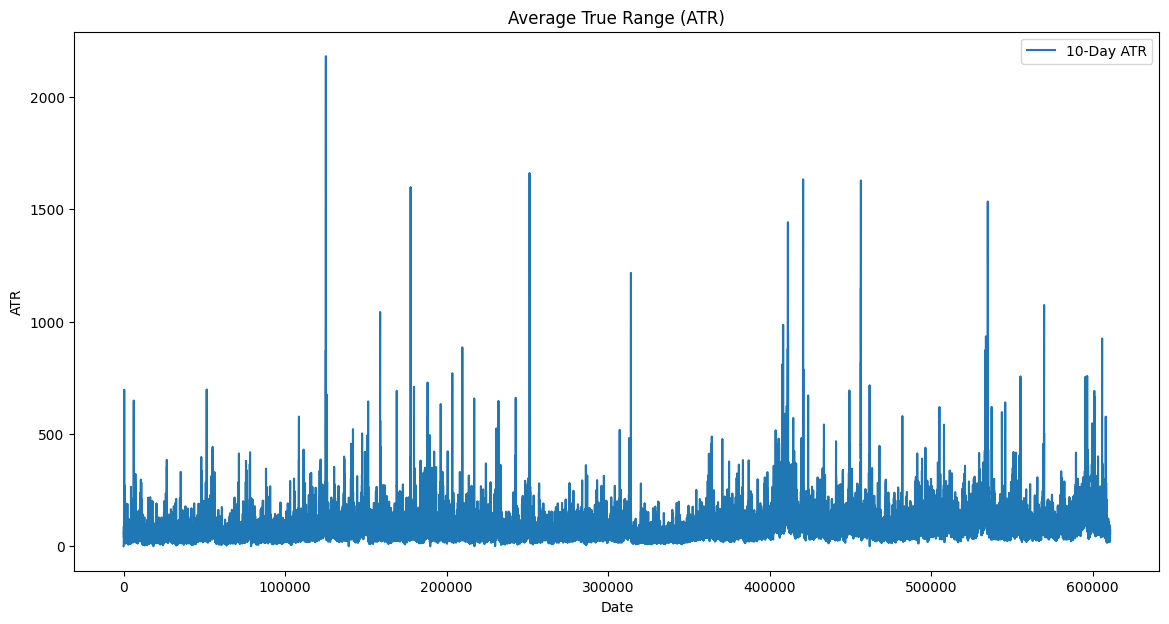

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['ATR'], label='10-Day ATR')
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.legend()
plt.show()


Performance analysis

In [ ]:
# Daily returns calculated as percentage change in the closing price from one day to the next
df['daily_return'] = df['close'].pct_change()
df['daily_return']

# drop null values
df['daily_return'].fillna(0, inplace=True)
df['daily_return'].head()

9     0.000000
10    0.000215
11    0.000000
12   -0.000328
13   -0.000643
Name: daily_return, dtype: float64

In [ ]:
# Calculate weekly returns
df['Weekly_Return'] = df['close'].pct_change(periods=7)
df['Weekly_Return'].fillna(0, inplace=True)
df['Weekly_Return'].head()


9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: Weekly_Return, dtype: float64

In [ ]:
# Calculate montly returns
df['Monthly_Return'] = df['close'].pct_change(periods=30)
df['Monthly_Return'].fillna(0, inplace=True)
df['Monthly_Return'].head()

9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: Monthly_Return, dtype: float64

In [ ]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,Volatility,ATR,daily_return,Weekly_Return,Monthly_Return
9,1646105580,2022-03-01 03:33:00,BTC/USD,43073.99,43098.42,43073.99,43098.42,0.028746,1238.889942,35.433818,0.0,0.000000,0.0,0.0
10,1646105520,2022-03-01 03:32:00,BTC/USD,43107.67,43107.67,43107.67,43107.67,0.000000,0.000000,37.718935,0.0,0.000215,0.0,0.0
11,1646105460,2022-03-01 03:31:00,BTC/USD,43089.57,43107.67,43089.57,43107.67,0.016570,714.294092,38.819423,0.0,0.000000,0.0,0.0
12,1646105400,2022-03-01 03:30:00,BTC/USD,43065.82,43106.72,43065.82,43093.52,0.313050,13490.426005,33.310729,0.0,-0.000328,0.0,0.0
13,1646105340,2022-03-01 03:29:00,BTC/USD,43085.12,43085.12,43042.51,43065.82,0.014378,619.218878,18.342702,0.0,-0.000643,0.0,0.0


In [ ]:
# Calculating the Sharpe Ratio
risk_free_rate = 0.02 / 252  # Convert annual rate to daily rate

# Calculate excess daily returns
df['excess_daily_return'] = df['daily_return'] - risk_free_rate

# Calculate the Sharpe Ratio
average_excess_return = df['excess_daily_return'].mean()
std_excess_return = df['excess_daily_return'].std()
sharpe_ratio = average_excess_return / std_excess_return

print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: -0.06087560577647841



**Comparing Performance: Helps to evaluate the risk and return profile of Bitcoin relative to traditional assets**



In [ ]:
import yfinance as yf

# Define the start and end date
start_date = '2021-01-01'
end_date = '2022-03-01'

# Download S&P 500 data
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

# Save to CSV file (optional)
sp500.to_csv('sp500_data.csv')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Calculate daily returns for S&P 500
sp500['daily_return'] = sp500['Close'].pct_change()


In [ ]:
sp500.head()


,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5015000000,NaN
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4591020000,0.007083
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6064110000,0.005710
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5099160000,0.014847
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4773040000,0.005492


In [ ]:
# Fill missing values for Bitcoin and S&P 500 daily returns
df['daily_return'].fillna(0, inplace=True)
sp500['daily_return'].fillna(0, inplace=True)

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample Bitcoin data to match S&P 500 trading days
df_resampled = df.resample('B').ffill()  # 'B' frequency stands for business day

# Ensure 'daily_return' column exists after resampling
df_resampled['daily_return'] = df_resampled['close'].pct_change()

In [ ]:
# Aligning the datasets on the date index
aligned_data = df_resampled[['daily_return']].join(sp500[['daily_return']], lsuffix='_crypto', rsuffix='_sp500')
aligned_data

,daily_return_crypto,daily_return_sp500
date,,
2021-01-01,NaN,NaN
2021-01-04,NaN,0.000000
2021-01-05,-0.029855,0.007083
2021-01-06,0.062399,0.005710
2021-01-07,0.083495,0.014847
...,...,...
2022-02-23,0.032183,-0.018412
2022-02-24,-0.027142,0.014957
2022-02-25,0.031021,0.022373


In [ ]:
# Drop NaN values
aligned_data = aligned_data.dropna()
aligned_data

,daily_return_crypto,daily_return_sp500
date,,
2021-01-05,-0.029855,0.007083
2021-01-06,0.062399,0.005710
2021-01-07,0.083495,0.014847
2021-01-08,0.069819,0.005492
2021-01-11,-0.032723,-0.006555
...,...,...
2022-02-22,-0.034453,-0.010143
2022-02-23,0.032183,-0.018412
2022-02-24,-0.027142,0.014957


In [ ]:
# Calculate cumulative returns
aligned_data.loc[:, 'cumulative_return_crypto'] = (1 + aligned_data['daily_return_crypto']).cumprod() - 1
aligned_data.loc[:, 'cumulative_return_sp500'] = (1 + aligned_data['daily_return_sp500']).cumprod() - 1


<ipython-input-201-f1aa35edb40c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_data.loc[:, 'cumulative_return_crypto'] = (1 + aligned_data['daily_return_crypto']).cumprod() - 1
<ipython-input-201-f1aa35edb40c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_data.loc[:, 'cumulative_return_sp500'] = (1 + aligned_data['daily_return_sp500']).cumprod() - 1


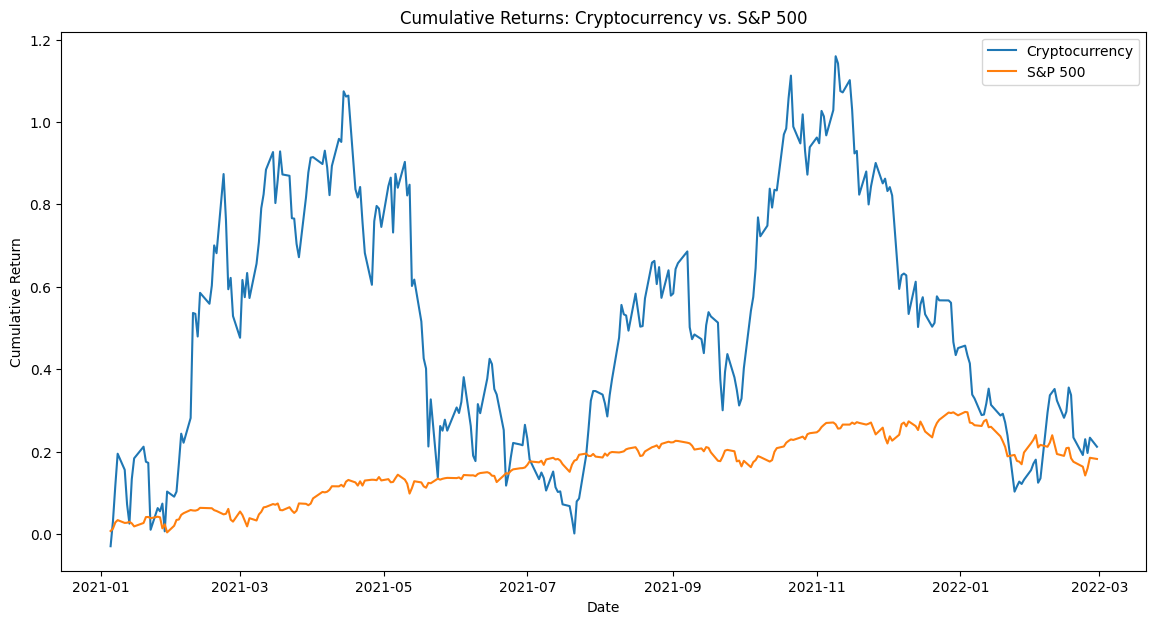

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(aligned_data.index, aligned_data['cumulative_return_crypto'], label='Cryptocurrency')
plt.plot(aligned_data.index, aligned_data['cumulative_return_sp500'], label='S&P 500')
plt.title('Cumulative Returns: Cryptocurrency vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

<ipython-input-203-09a5c4653fdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_data.loc[:, 'MA_10_crypto'] = aligned_data['daily_return_crypto'].rolling(window=10).mean()
<ipython-input-203-09a5c4653fdd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_data.loc[:, 'MA_50_crypto'] = aligned_data['daily_return_crypto'].rolling(window=50).mean()
<ipython-input-203-09a5c4653fdd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

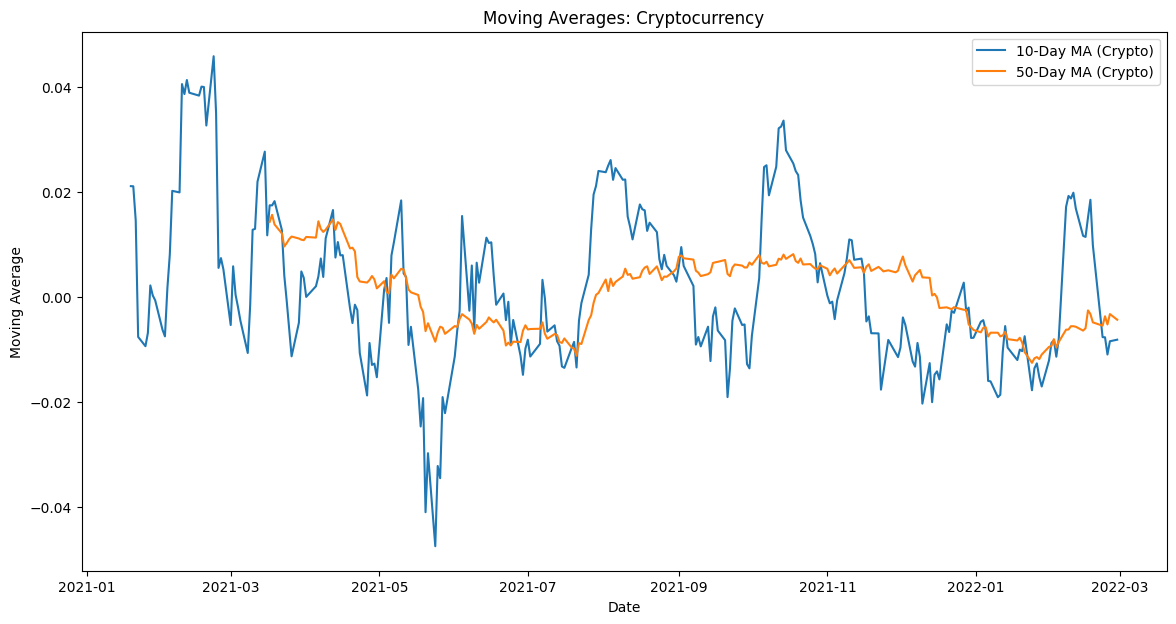

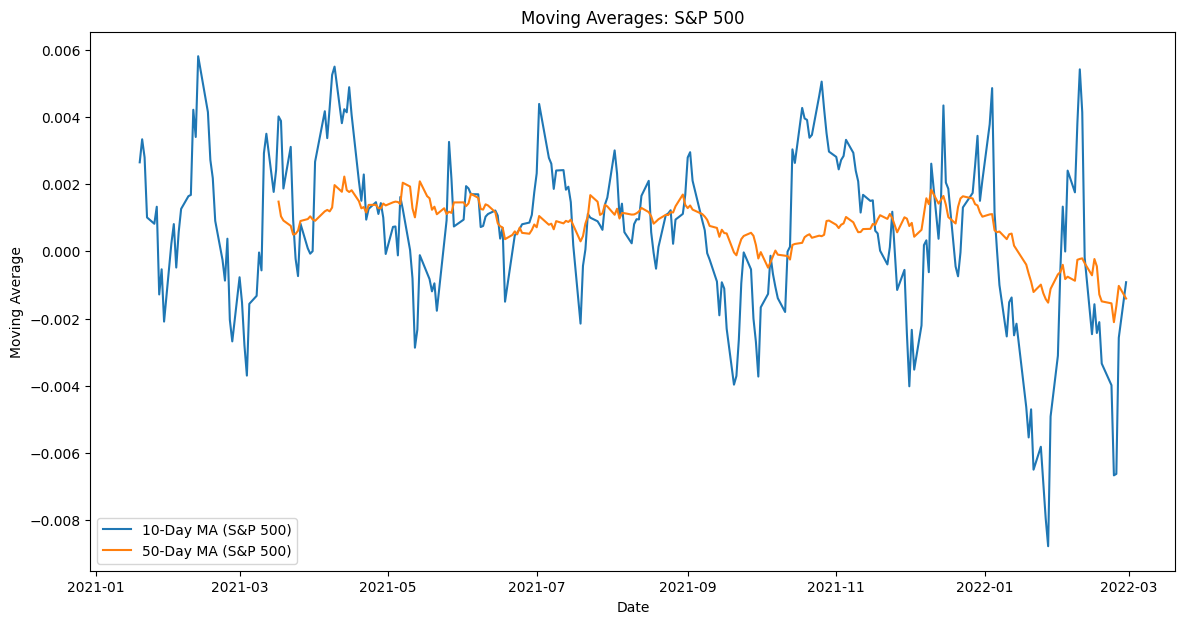

In [ ]:
# Calculate moving averages
# Calculate moving averages using .loc to avoid SettingWithCopyWarning
aligned_data.loc[:, 'MA_10_crypto'] = aligned_data['daily_return_crypto'].rolling(window=10).mean()
aligned_data.loc[:, 'MA_50_crypto'] = aligned_data['daily_return_crypto'].rolling(window=50).mean()
aligned_data.loc[:, 'MA_10_sp500'] = aligned_data['daily_return_sp500'].rolling(window=10).mean()
aligned_data.loc[:, 'MA_50_sp500'] = aligned_data['daily_return_sp500'].rolling(window=50).mean()

aligned_data.index = pd.to_datetime(aligned_data.index)

# Plot moving averages for Cryptocurrency
plt.figure(figsize=(14, 7))
plt.plot(aligned_data.index, aligned_data['MA_10_crypto'], label='10-Day MA (Crypto)')
plt.plot(aligned_data.index, aligned_data['MA_50_crypto'], label='50-Day MA (Crypto)')
plt.title('Moving Averages: Cryptocurrency')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

# Plot moving averages for S&P 500
plt.figure(figsize=(14, 7))
plt.plot(aligned_data.index, aligned_data['MA_10_sp500'], label='10-Day MA (S&P 500)')
plt.plot(aligned_data.index, aligned_data['MA_50_sp500'], label='50-Day MA (S&P 500)')
plt.title('Moving Averages: S&P 500')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

In [ ]:
aligned_data

,daily_return_crypto,daily_return_sp500,cumulative_return_crypto,cumulative_return_sp500,MA_10_crypto,MA_50_crypto,MA_10_sp500,MA_50_sp500
date,,,,,,,,
2021-01-05,-0.029855,0.007083,-0.029855,0.007083,NaN,NaN,NaN,NaN
2021-01-06,0.062399,0.005710,0.030681,0.012833,NaN,NaN,NaN,NaN
2021-01-07,0.083495,0.014847,0.116737,0.027871,NaN,NaN,NaN,NaN
2021-01-08,0.069819,0.005492,0.194707,0.033516,NaN,NaN,NaN,NaN
2021-01-11,-0.032723,-0.006555,0.155613,0.026741,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-02-22,-0.034453,-0.010143,0.191539,0.163244,-0.007674,-0.005494,-0.003984,-0.001549
2022-02-23,0.032183,-0.018412,0.229886,0.141826,-0.007701,-0.003699,-0.006666,-0.002108
2022-02-24,-0.027142,0.014957,0.196504,0.158905,-0.010975,-0.005262,-0.006622,-0.001626


Relative Strength Index (RSI): to measure the speed and change of price movements and can identify overbought or oversold conditions.


<ipython-input-206-6a440b4f534e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_data['RSI_crypto'] = calculate_rsi(aligned_data['daily_return_crypto'])
<ipython-input-206-6a440b4f534e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_data['RSI_sp500'] = calculate_rsi(aligned_data['daily_return_sp500'])


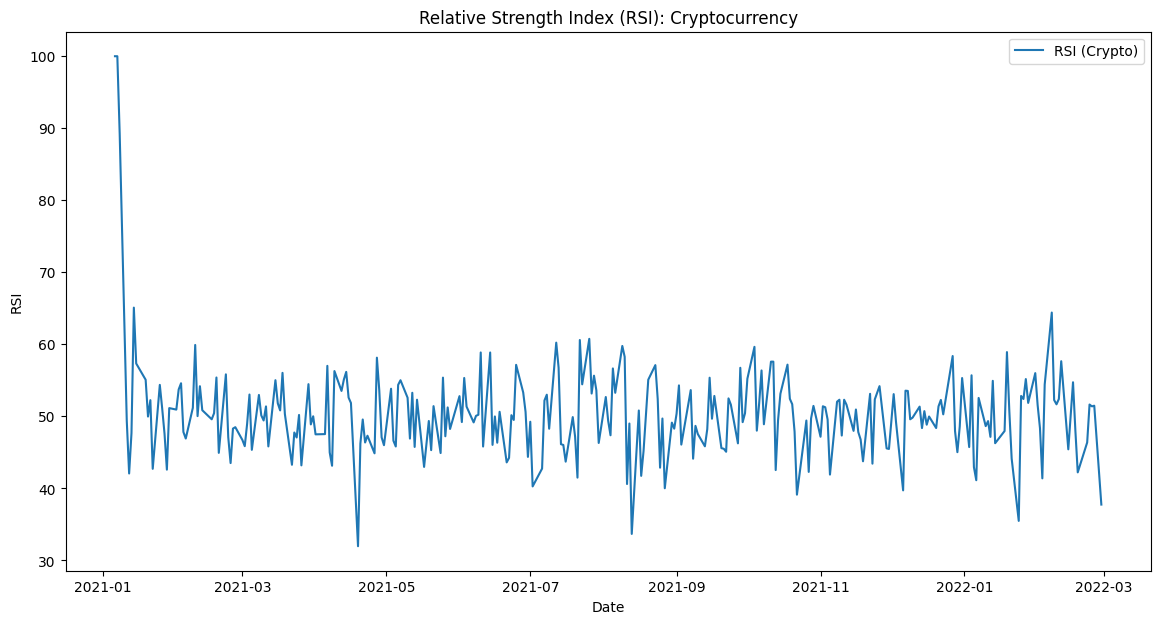

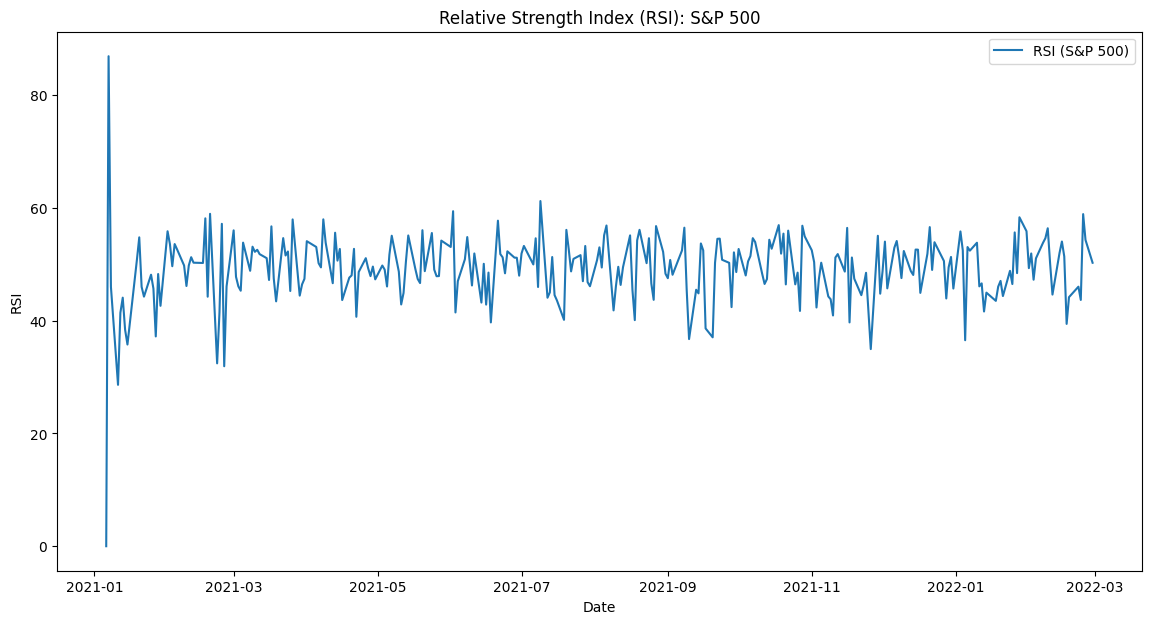

In [ ]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

aligned_data['RSI_crypto'] = calculate_rsi(aligned_data['daily_return_crypto'])
aligned_data['RSI_sp500'] = calculate_rsi(aligned_data['daily_return_sp500'])

# Plot RSI for Cryptocurrency
plt.figure(figsize=(14, 7))
plt.plot(aligned_data.index, aligned_data['RSI_crypto'], label='RSI (Crypto)')
plt.title('Relative Strength Index (RSI): Cryptocurrency')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot RSI for S&P 500
plt.figure(figsize=(14, 7))
plt.plot(aligned_data.index, aligned_data['RSI_sp500'], label='RSI (S&P 500)')
plt.title('Relative Strength Index (RSI): S&P 500')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


Moving Average Convergence Divergence (MACD): used to identify changes in the strength, direction, momentum, and duration of a trend.


<ipython-input-207-3f5387e7fa8d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_data['MACD_crypto'], aligned_data['Signal_crypto'] = calculate_macd(aligned_data['daily_return_crypto'])
<ipython-input-207-3f5387e7fa8d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_data['MACD_crypto'], aligned_data['Signal_crypto'] = calculate_macd(aligned_data['daily_return_crypto'])
<ipython-input-207-3f5387e7fa8d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

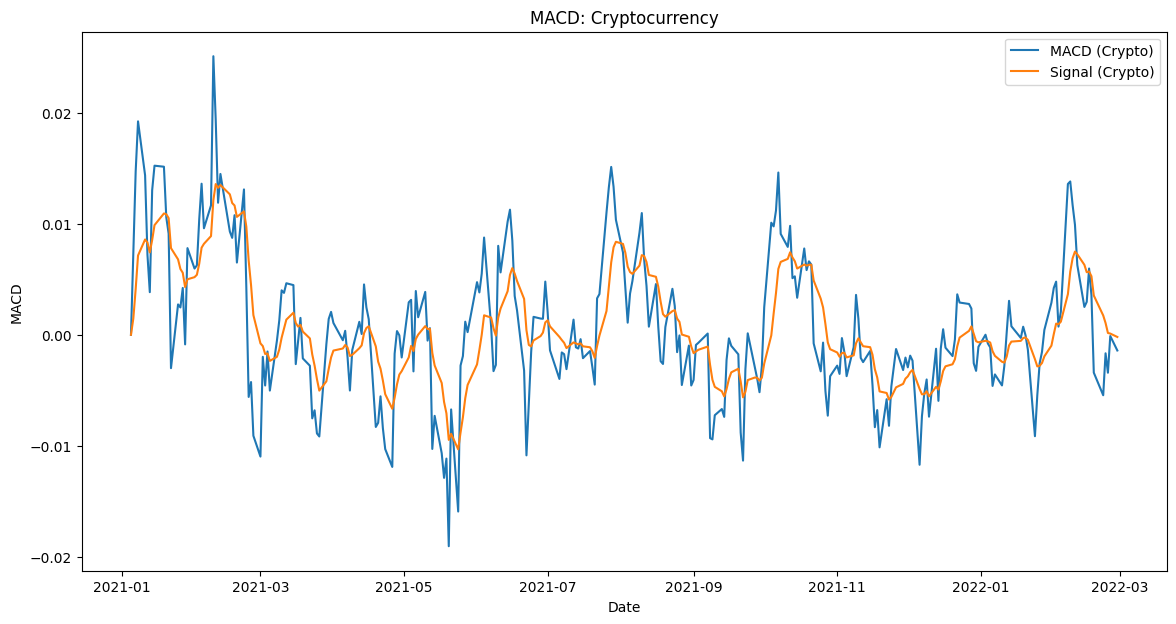

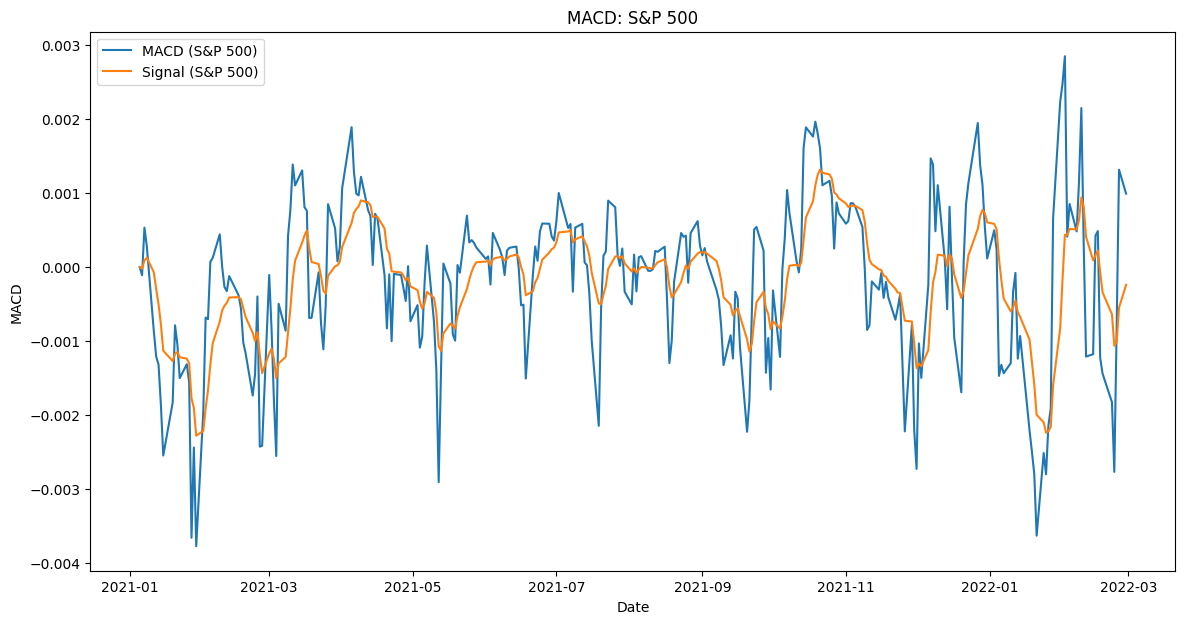

In [ ]:
# Moving Average Convergence Divergence (MACD)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

aligned_data['MACD_crypto'], aligned_data['Signal_crypto'] = calculate_macd(aligned_data['daily_return_crypto'])
aligned_data['MACD_sp500'], aligned_data['Signal_sp500'] = calculate_macd(aligned_data['daily_return_sp500'])

# Plot MACD for Cryptocurrency
plt.figure(figsize=(14, 7))
plt.plot(aligned_data.index, aligned_data['MACD_crypto'], label='MACD (Crypto)')
plt.plot(aligned_data.index, aligned_data['Signal_crypto'], label='Signal (Crypto)')
plt.title('MACD: Cryptocurrency')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# Plot MACD for S&P 500
plt.figure(figsize=(14, 7))
plt.plot(aligned_data.index, aligned_data['MACD_sp500'], label='MACD (S&P 500)')
plt.plot(aligned_data.index, aligned_data['Signal_sp500'], label='Signal (S&P 500)')
plt.title('MACD: S&P 500')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()


Predictive Modeling

In [ ]:
df.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,Volatility,ATR,daily_return,Weekly_Return,Monthly_Return,excess_daily_return
date,,,,,,,,,,,,,,
2022-03-01 03:33:00,1646105580,BTC/USD,43073.99,43098.42,43073.99,43098.42,0.028746,1238.889942,35.433818,0.0,0.000000,0.0,0.0,-0.000079
2022-03-01 03:32:00,1646105520,BTC/USD,43107.67,43107.67,43107.67,43107.67,0.000000,0.000000,37.718935,0.0,0.000215,0.0,0.0,0.000135
2022-03-01 03:31:00,1646105460,BTC/USD,43089.57,43107.67,43089.57,43107.67,0.016570,714.294092,38.819423,0.0,0.000000,0.0,0.0,-0.000079
2022-03-01 03:30:00,1646105400,BTC/USD,43065.82,43106.72,43065.82,43093.52,0.313050,13490.426005,33.310729,0.0,-0.000328,0.0,0.0,-0.000408
2022-03-01 03:29:00,1646105340,BTC/USD,43085.12,43085.12,43042.51,43065.82,0.014378,619.218878,18.342702,0.0,-0.000643,0.0,0.0,-0.000722


In [ ]:
x = df[['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD', 'daily_return']]
y = df['close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((488618, 7), (122155, 7), (488618,), (122155,))

In [ ]:
x_train.head()


,open,high,low,close,Volume BTC,Volume USD,daily_return
date,,,,,,,
2021-05-29 07:05:00,36639.81,36639.81,36630.46,36630.46,1.287828,47173.748891,-0.000880
2022-01-12 17:24:00,43664.46,43668.14,43663.06,43667.84,0.148410,6480.744134,-0.001170
2021-06-26 10:25:00,31123.04,31201.75,31118.50,31160.74,4.404494,137247.283641,0.001357
2021-09-26 01:06:00,42506.08,42551.51,42498.42,42551.51,2.488550,105891.560210,-0.000042
2022-02-08 06:35:00,44836.59,44836.59,44754.35,44754.35,0.224469,10045.983435,-0.001974


In [ ]:
y_train.head()


date
2021-05-29 07:05:00    36630.46
2022-01-12 17:24:00    43667.84
2021-06-26 10:25:00    31160.74
2021-09-26 01:06:00    42551.51
2022-02-08 06:35:00    44754.35
Name: close, dtype: float64

In [ ]:
x_test.head()

,open,high,low,close,Volume BTC,Volume USD,daily_return
date,,,,,,,
2021-07-18 21:41:00,31677.44,31684.36,31660.26,31684.36,0.057021,1806.673892,0.000023
2021-05-22 04:07:00,37176.00,37227.25,37131.38,37155.21,1.143506,42487.188475,-0.001444
2021-08-17 09:26:00,46549.79,46559.74,46519.77,46557.72,1.163233,54157.466532,0.000446
2021-07-13 06:53:00,33014.91,33045.52,33014.91,33045.52,0.528305,17458.123027,0.000838
2021-12-19 13:55:00,47140.67,47156.63,47140.67,47156.63,0.103000,4857.132890,-0.003407


In [ ]:
y_test.head()

date
2021-07-18 21:41:00    31684.36
2021-05-22 04:07:00    37155.21
2021-08-17 09:26:00    46557.72
2021-07-13 06:53:00    33045.52
2021-12-19 13:55:00    47156.63
Name: close, dtype: float64

In [ ]:
# Fit the ARIMA model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_arima = ARIMA(y_train, order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Forecast
forecast_arima = model_arima_fit.forecast(steps=len(y_test))

# Evaluate ARIMA model
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))
mae_arima = mean_absolute_error(y_test, forecast_arima)
r2_arima = r2_score(y_test, forecast_arima)

print(f'ARIMA RMSE: {rmse_arima}')
print(f'ARIMA MAE: {mae_arima}')
print(f'ARIMA R-squared: {r2_arima}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA RMSE: 9472.129584349295
ARIMA MAE: 8001.884313435078
ARIMA R-squared: -0.005810371228776479


In [ ]:
#LSTM Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare the data for LSTM
X_train_lstm = np.array(x_train).reshape((x_train.shape[0], 1, x_train.shape[1]))
X_test_lstm = np.array(x_test).reshape((x_test.shape[0], 1, x_test.shape[1]))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

# Forecast
forecast_lstm = model_lstm.predict(X_test_lstm)

# Evaluate LSTM model
rmse_lstm = np.sqrt(mean_squared_error(y_test, forecast_lstm))
mae_lstm = mean_absolute_error(y_test, forecast_lstm)
r2_lstm = r2_score(y_test, forecast_lstm)

print(f'LSTM RMSE: {rmse_lstm}')
print(f'LSTM MAE: {mae_lstm}')
print(f'LSTM R-squared: {r2_lstm}')


Epoch 1/10
15270/15270 [==============================] - 133s 8ms/step - loss: 2220454144.0000
Epoch 2/10
15270/15270 [==============================] - 92s 6ms/step - loss: 2165754624.0000
Epoch 3/10
15270/15270 [==============================] - 80s 5ms/step - loss: 2111805184.0000
Epoch 4/10
15270/15270 [==============================] - 76s 5ms/step - loss: 2058573568.0000
Epoch 5/10
15270/15270 [==============================] - 73s 5ms/step - loss: 2006055680.0000
Epoch 6/10
15270/15270 [==============================] - 78s 5ms/step - loss: 1954245632.0000
Epoch 7/10
15270/15270 [==============================] - 80s 5ms/step - loss: 1903129088.0000
Epoch 8/10
15270/15270 [==============================] - 76s 5ms/step - loss: 1852756608.0000
Epoch 9/10
15270/15270 [==============================] - 78s 5ms/step - loss: 1803081728.0000
Epoch 10/10
3818/3818 [==============================] - 11s 3ms/step
LSTM RMSE: 41615.4926768553
LSTM MAE: 40529.57308005518
LSTM R-squared: -1

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

# Forecast
forecast_rf = model_rf.predict(x_test)

# Evaluate Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, forecast_rf))
mae_rf = mean_absolute_error(y_test, forecast_rf)
r2_rf = r2_score(y_test, forecast_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest RMSE: 0.714655920440065
Random Forest MAE: 0.057496392497630625
Random Forest R-squared: 0.9999999942744813


# My Insights
* ARIMA and LSTM Models: Both the ARIMA and LSTM models performed poorly, indicating that they might not be well-suited for this particular dataset or that further tuning and preprocessing might be required.
* Random Forest Model: The Random Forest model performed exceptionally well, indicating that it can effectively capture the patterns in the data.

In [ ]:
# Feature Importance Analysis: to determine which features are most important in the model's predictions.
importances = model_rf.feature_importances_
feature_names = x.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


        Feature    Importance
3         close  1.000000e+00
2           low  9.455485e-09
4    Volume BTC  2.763099e-09
5    Volume USD  2.332923e-09
1          high  9.531430e-10
6  daily_return  5.509301e-10
0          open  5.083195e-10
